In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_data= pd.read_excel("netflix data.xlsx")

In [3]:
netflix_data.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
netflix_data.shape

(8790, 10)

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
netflix_data["date_added"]=pd.to_datetime(netflix_data["date_added"])

In [7]:
netflix_data.duplicated().value_counts()

False    8790
Name: count, dtype: int64

In [8]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
netflix_data.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

In [10]:
netflix_data["director"].value_counts()

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
RaÃºl Campos, Jan Suter             18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [11]:
netflix_data['year_added']=pd.DatetimeIndex(netflix_data['date_added']).year
netflix_data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021


Analysis

In [12]:
types=netflix_data["type"].value_counts()
#types.reset_index()
types

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

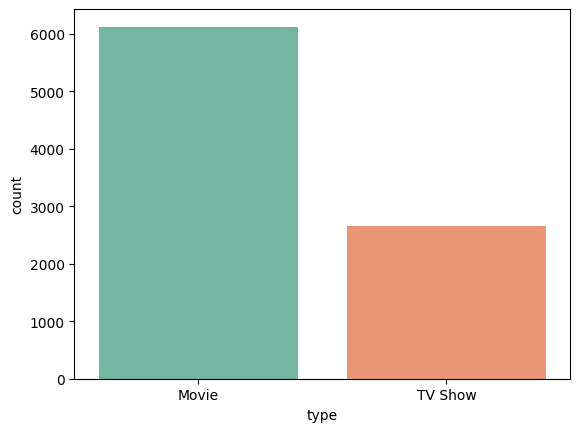

In [13]:
sns.countplot(x='type', hue='type', data=netflix_data, palette="Set2", legend=False)
plt.show()

In [14]:
movies_by_country=netflix_data["country"].value_counts().drop("Not Given").head(10).reset_index()
movies_by_country

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Canada,271
5,Japan,259
6,South Korea,214
7,France,213
8,Spain,182
9,Mexico,138


In [15]:
tv_show_count=netflix_data[netflix_data['type']=='TV Show'].groupby("country")['type'].count().reset_index().rename(columns = {'type':'Total Tv shows'})
Movies_count=netflix_data[netflix_data['type']=='Movie'].groupby("country")['type'].count().reset_index().rename(columns = {'type':'Total Movies'})
df=pd.merge(tv_show_count,Movies_count,on='country')
df.sort_values(by='Total Tv shows', key=df['Total Movies'].add,ascending=False,inplace=True)
df.drop([33],axis='index',inplace=True)
df=df.head(10)
df

,country,Total Tv shows,Total Movies
50,United States,845,2395
18,India,81,976
49,United Kingdom,251,387
34,Pakistan,350,71
5,Canada,84,187
23,Japan,172,87
41,South Korea,165,49
14,France,65,148
42,Spain,53,129
28,Mexico,48,90


<Axes: xlabel='country'>

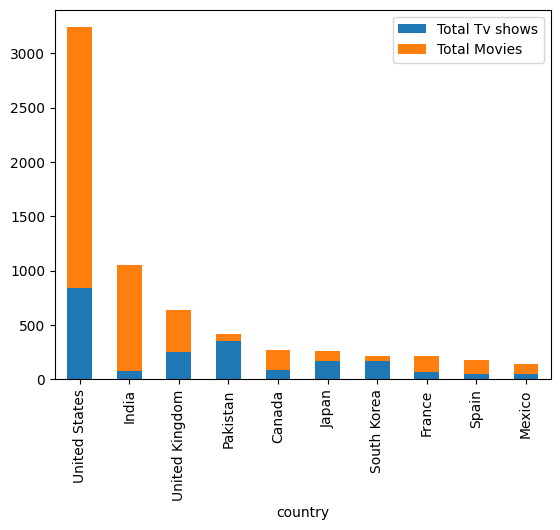

In [16]:
df.plot.bar(x='country', stacked=True)

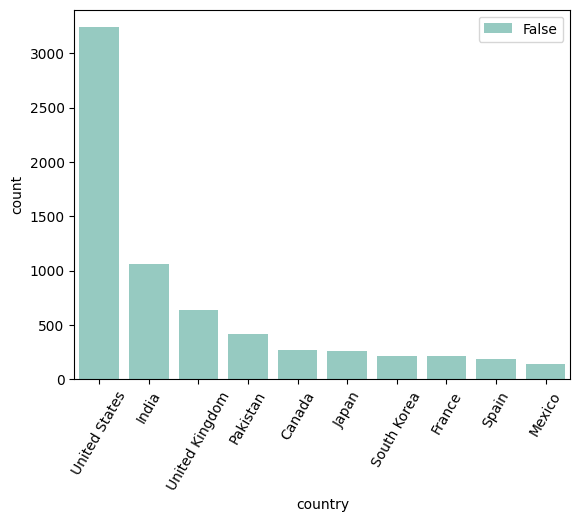

In [17]:
sns.barplot(movies_by_country,x='country',y='count',palette="Set3",hue=False)
plt.xticks(rotation=60)
plt.show()

In [18]:
countries_count=netflix_data.groupby(["type"])["country"].value_counts().reset_index()
countries_count

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
2,Movie,United Kingdom,387
3,Movie,Not Given,257
4,Movie,Canada,187
...,...,...,...
133,TV Show,Luxembourg,1
134,TV Show,Puerto Rico,1
135,TV Show,Croatia,1
136,TV Show,Mauritius,1


In [19]:
top_10_countries = countries_count.sort_values(by="count",ascending=False).head(10)
top_10_countries

,type,country,count
0,Movie,United States,2395
1,Movie,India,976
79,TV Show,United States,845
2,Movie,United Kingdom,387
80,TV Show,Pakistan,350
3,Movie,Not Given,257
81,TV Show,United Kingdom,251
4,Movie,Canada,187
82,TV Show,Japan,172
83,TV Show,South Korea,165


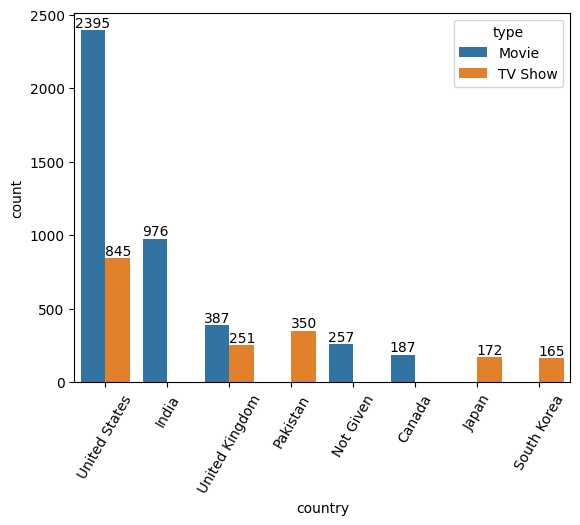

In [20]:
ax=sns.barplot(data=top_10_countries,x="country",y="count",hue="type")
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=60)
plt.show()

In [21]:
movies_by_year=netflix_data['year_added'].value_counts().reset_index()
movies_by_year

,year_added,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


Text(0.5, 1.0, 'Movies added in Years')

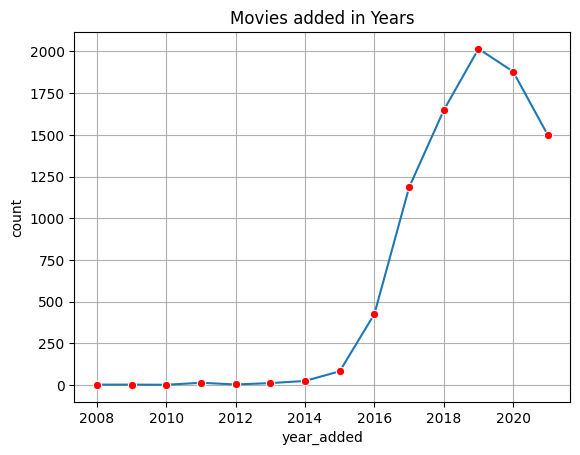

In [22]:
sns.lineplot(data=movies_by_year,x=movies_by_year['year_added'],y=movies_by_year['count'],marker='o',markerfacecolor='red')
plt.grid()
plt.title("Movies added in Years")

Movies and shows by rating

<Axes: xlabel='rating', ylabel='count'>

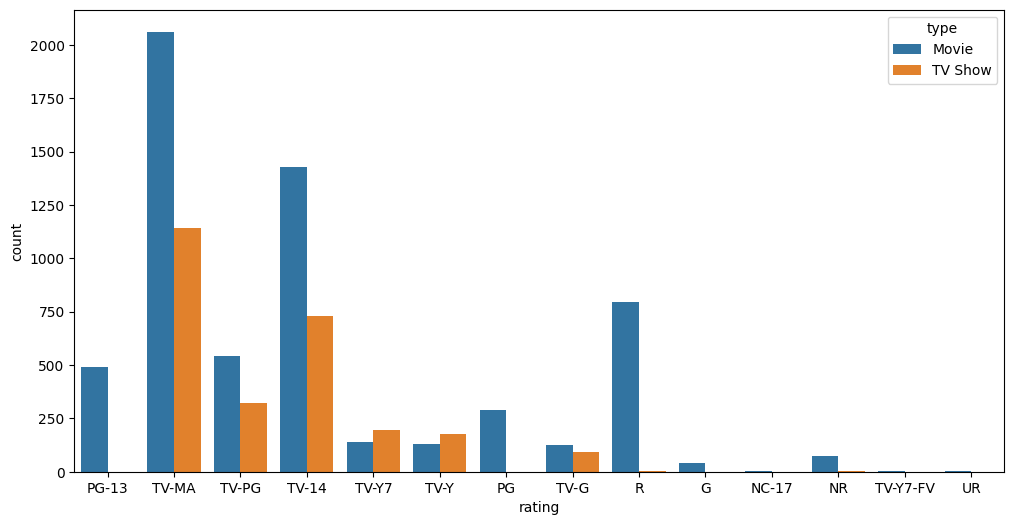

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating',data = netflix_data,hue='type')

In [24]:
listed_in=netflix_data["listed_in"].value_counts()
top_10_genre=listed_in.head(10).reset_index()
top_10_genre

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,219
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


C:\Users\Smart pc\AppData\Local\Temp\ipykernel_11740\2285941793.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_genre, x=top_10_genre["count"],y=top_10_genre["listed_in"],palette='Blues_d')


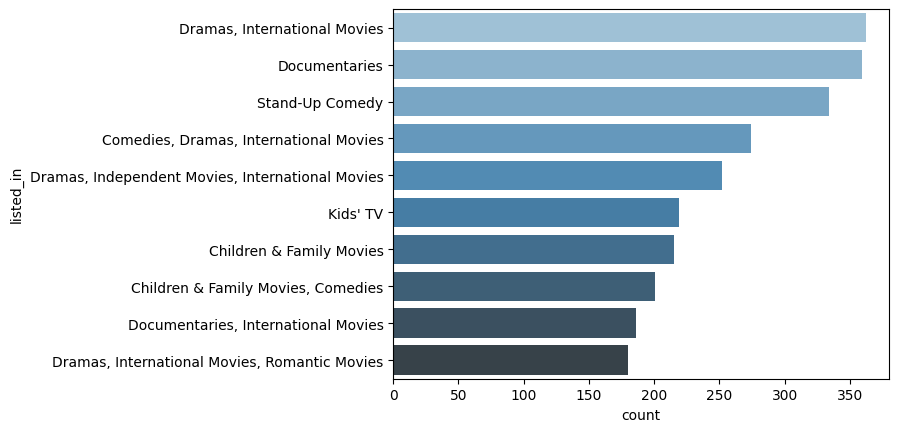

In [25]:
sns.barplot(data=top_10_genre, x=top_10_genre["count"],y=top_10_genre["listed_in"],palette='Blues_d')
plt.show()

In [26]:
in_india= netflix_data[netflix_data["country"]=="India"].groupby('listed_in')['show_id'].count().reset_index()
in_india.sort_values(by='show_id', ascending=False,inplace=True)
in_india=in_india.head(5)

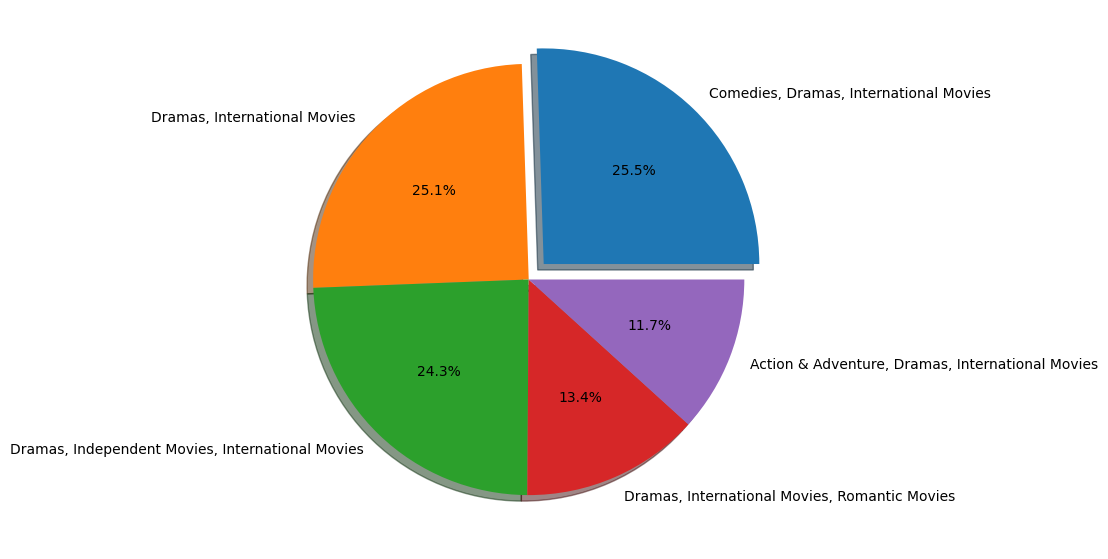

In [27]:
plt.figure(figsize=(7, 7))
plt.pie(in_india['show_id'],labels=in_india["listed_in"],shadow=True,explode=(0.1, 0.0, 0.0, 0.0, 0.0,), autopct='%1.1f%%')
plt.show()

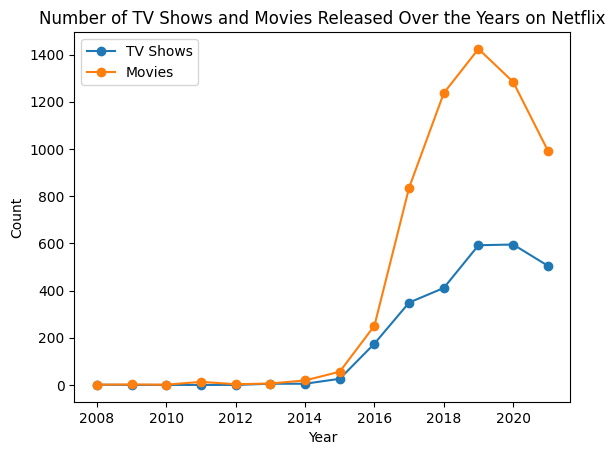

In [28]:
shows_by_year=netflix_data[netflix_data['type']=='TV Show'].groupby('year_added')['type'].value_counts().reset_index()
movies_by_year=netflix_data[netflix_data['type']=='Movie'].groupby('year_added')['type'].value_counts().reset_index()

combined_data = pd.concat([shows_by_year, movies_by_year], ignore_index=True)
pivot_data = combined_data.pivot_table(index='year_added', columns='type', values='count', fill_value=0)

plt.plot(pivot_data.index, pivot_data['TV Show'], label='TV Shows', marker='o')

plt.plot(pivot_data.index, pivot_data['Movie'], label='Movies', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of TV Shows and Movies Released Over the Years on Netflix')

plt.legend()
plt.show()
